# Обучение однослойного персептрона методом стохастического градиентного спуска

In [1]:
import numpy as np

In [3]:
def load_data(path):
    with np.load(path, allow_pickle=True) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data('D:\homework\mnist.npz')

In [4]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


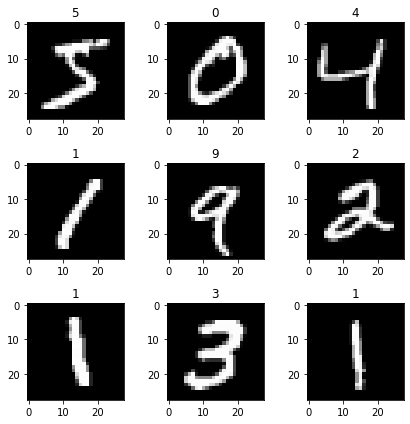

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(str(y_train[i]))
plt.tight_layout()
plt.show()

In [48]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [2]:
# Создадим однослойный персептрон с 28*28 входными нейронами и выходом размера 10 - вектором вероятности класса.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, LogSoftmax

In [ ]:
import os

class Dataset_train(torch.utils.data.Dataset):
    def __init__(self, transform):
        self.transform = transform

        (X_train, y_train), (_, _) = load_data('D:\homework\mnist.npz')

        self.X_train = X_train
        self.y_train = y_train
        self.classes = len(np.unique(self.y_train))

    def __getitem__(self, idx):
        image = self.X_train[idx]
        label = self.y_train[idx]
        if self.transform:
            image = self.transform(image)
            label = torch.tensor(label)
        image = image.reshape(-1)
        return image.float(), label.float()
    
    def __len__(self):
        return self.X_train.shape[0]

import torchvision
from torch.utils.data import DataLoader

train_dataset = Dataset_train(transform=torchvision.transforms.ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
input_size = X_train.shape[1] * X_train.shape[2]
output_size = 10
batch_size = 64

In [ ]:
loss_curves = []
device = 'cuda'

model = torch.nn.Sequential(
    Linear (input_size, output_size),
    LogSoftmax(),
 ).to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epoch = 50
losses = []
acc = []

In [1]:
for epoch in range(num_epoch):
    loss_curve = []
    accuracy_curve = []
    for i, (train_features, train_labels) in enumerate(train_dataloader):
        X = train_features.to(device)
        y = train_labels.type(torch.LongTensor).to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        accuracy = ((torch.max(y_pred.data, 1)[1] == y).sum() / len(y)).cpu().detach().numpy()
        accuracy_curve.append(accuracy)
        loss_curve.append(loss.cpu().detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(np.mean(loss_curve))
    acc.append(np.mean(accuracy_curve))